<a href="https://colab.research.google.com/github/mikeguzman1294/BinaryClassification/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Challenge - Binary Classification
***
*Author: Miguel Ángel Guzmán Sánchez*
***
Contact regarding the code: mikeguzman1294@gmail.com
***

This notebooks solves a Binary Classification task given 2 tabular datasets.

This notebook is divided in 5 main sections.



1.   **Environment Setup**
2.   **Exploratory Data Analysis**
3.   **Data Preprocessing**
4.   **Classification Modelling**
5.   **Concluding Remarks**

[Datasets Location](https://github.com/mikeguzman1294/BinaryClassification/tree/main/Datasets)

[Technical Report Documentation](https://github.com/mikeguzman1294/BinaryClassification/tree/main/Documentation)

## Prepare the Environment

### Import Libraries

General Use Libraries

In [184]:
# Import useful libraries

import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import scipy as sp
from IPython.display import Image

Scikit-Learn Libraries

In [185]:
# Data Preprocessing Tools

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [186]:
# Predictive Models

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Model Selection

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [187]:
# Handle Imbalanced Dataset

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [188]:
# Performance Metrics

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

### Import the Data

Clone repository containing the data.

In [189]:
# Clone the repo containing the raw data

!git clone -l -s https://github.com/mikeguzman1294/BinaryClassification.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 3), reused 8 (delta 2), pack-reused 0
Unpacking objects: 100% (16/16), 98.08 KiB | 2.18 MiB/s, done.


In [190]:
# Move to the relative path containing the cloned repo's data

%cd cloned-repo/Datasets
!ls

/content/cloned-repo/Datasets/cloned-repo/Datasets/cloned-repo/Datasets
Task1_1.csv  Task1_2.csv


Convert the dataset files into Pandas Dataframes.

**DataFrame 1** : *Task 1_1*

In [191]:
# Convert csv into Pandas Dataframe
raw_df_1 = pd.read_csv('Task1_1.csv', sep=";")

**DataFrame 2** : *Task 1_2*

In [192]:
# Convert csv into Pandas Dataframe
raw_df_2 = pd.read_csv('Task1_2.csv', sep=";")

## Exploratory Data Analysis

### TASK 1 - Analysis

Explore the first 10 instances of Task 1.

In [193]:
# Check the head as a sanity check of correct loading of the data
raw_df_1.head(10)

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq
5,5,8,rrr,y,oooo,pppp,0.0,kkk,160.0,1600000.0,hhhh
6,6,152,oooo,NaN,oooo,www,1.0,lll,276.0,2760000.0,lll
7,7,176,rrr,NaN,oooo,pppp,204.0,vvvv,280.0,2800000.0,hhhh
8,8,154,oooo,NaN,oooo,www,140.0,vvvv,220.0,2200000.0,qqqq
9,9,95,oooo,NaN,oooo,www,13.0,vvvv,320.0,3200000.0,hhhh


Get an overall insight on Task 1 dataframe content.

In [194]:
# Get the shape of the dataframe
print(f'Dataset shape:\n{raw_df_1.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{raw_df_1.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{raw_df_1.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{raw_df_1.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{raw_df_1.describe(include = object).transpose()}')

Dataset shape:
(4070, 11)

Dataset attributes:
Index(['ID', 'UKL', 'GJAH', 'ZIK', 'HUI', 'ERZ', 'CDx', 'BJZHD', 'NKJUD',
       'LPI', 'BJKG'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      4070 non-null   int64  
 1   UKL     4070 non-null   int64  
 2   GJAH    4006 non-null   object 
 3   ZIK     1705 non-null   object 
 4   HUI     4070 non-null   object 
 5   ERZ     4006 non-null   object 
 6   CDx     4070 non-null   float64
 7   BJZHD   4004 non-null   object 
 8   NKJUD   3966 non-null   float64
 9   LPI     3966 non-null   float64
 10  BJKG    4004 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 349.9+ KB
Dataset general information:
None

Dataset description:
Numerical Data
        count          mean           std  min     25%        50%         75%  \
ID     4070.0  1.842796e+03  

Do a direct call for printing missing values.

In [195]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((raw_df_1.isnull().sum() / len(raw_df_1))) * 100}\n')

Percentage of Null Values per Feature
ID        0.000000
UKL       0.000000
GJAH      1.572482
ZIK      58.108108
HUI       0.000000
ERZ       1.572482
CDx       0.000000
BJZHD     1.621622
NKJUD     2.555283
LPI       2.555283
BJKG      1.621622
dtype: float64



### TASK 2 - Analysis

Explore the first 10 instances of Task 2.

In [196]:
# Check the head as a sanity check of correct loading of the data
raw_df_2.head(10)

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
4,0,0.500,4,t,f,wwww,f,n,32.33
5,0,0.500,5,t,f,uuuu,f,n,34.83
6,0,0.000,6,t,f,uuuu,f,n,26.17
7,0,0.250,7,f,f,wwww,f,n,21.17
8,0,0.290,8,f,f,wwww,f,n,28.92
9,0,1.085,9,f,f,wwww,f,n,18.17


In [197]:
# Get the shape of the dataframe
print(f'Dataset shape:\n{raw_df_2.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{raw_df_2.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{raw_df_2.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{raw_df_2.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{raw_df_2.describe(include = object).transpose()}')

Dataset shape:
(4070, 9)

Dataset attributes:
Index(['POUG', 'TRE', 'ID', 'ZUB', 'VOL', 'UIO', 'VBNM', 'Type', 'OIN'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4070 entries, 0 to 4069
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   POUG    4070 non-null   int64  
 1   TRE     4070 non-null   float64
 2   ID      4070 non-null   int64  
 3   ZUB     4070 non-null   object 
 4   VOL     4070 non-null   object 
 5   UIO     4027 non-null   object 
 6   VBNM    4070 non-null   object 
 7   Type    4070 non-null   object 
 8   OIN     4028 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 286.3+ KB
Dataset general information:
None

Dataset description:
Numerical Data
       count         mean          std    min     25%      50%      75%  \
POUG  4070.0     4.141032     6.696288   0.00    0.00     2.00     6.00   
TRE   4070.0     3.412081     4.322153   0.00    0.50     1.75    

Do a direct call for printing missing values.

In [198]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((raw_df_2.isnull().sum() / len(raw_df_1))) * 100}\n')

Percentage of Null Values per Feature
POUG    0.000000
TRE     0.000000
ID      0.000000
ZUB     0.000000
VOL     0.000000
UIO     1.056511
VBNM    0.000000
Type    0.000000
OIN     1.031941
dtype: float64



## Data Preprocessing

Create copies fo the raw data before making transformations.

In [199]:
# Make a copy of the raw datasets to keep the original information untouched

df_1 = raw_df_1.copy()
df_2 = raw_df_2.copy()

### Sort DataFrames

Sort the DataFrames by ID column for agilizing insights.

In [200]:
# Sort dataframes by ID in ascending order

df_1 = df_1.sort_values(by=['ID'], ascending=True)
df_2 = df_2.sort_values(by=['ID'], ascending=True)

Check both DataFrames after sorting.

In [201]:
df_1

,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq
3850,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq
...,...,...,...,...,...,...,...,...,...,...,...
3811,3695,74,oooo,x,oooo,www,26726.0,sss,NaN,NaN,qqqq
3696,3696,179,oooo,x,oooo,www,0.0,sss,120.0,1200000.0,qqqq
3697,3697,82,oooo,NaN,oooo,www,221.0,vvvv,0.0,0.0,qqqq
3698,3698,13,oooo,NaN,oooo,www,3.0,yyy,100.0,1000000.0,qqqq


In [202]:
df_2

,POUG,TRE,ID,ZUB,VOL,UIO,VBNM,Type,OIN
0,1,1.750,0,t,f,uuuu,t,n,17.92
3877,0,0.290,1,f,f,wwww,f,n,16.92
1,0,0.290,1,f,f,wwww,f,n,16.92
2,1,0.000,2,f,f,wwww,t,n,31.25
3,0,0.335,3,f,f,uuuu,f,n,48.17
...,...,...,...,...,...,...,...,...,...
3695,5,2.710,3695,f,t,uuuu,t,y,18.75
3696,5,8.500,3696,t,t,uuuu,t,y,23.50
3697,12,4.500,3697,t,t,wwww,t,y,34.17
3698,5,3.750,3698,t,t,wwww,t,y,27.83


Taking a glimpse on the sorted frames it seems that there may be duplicated rows or multiple entries per ID on each table. We will take a look in the next subsection.

### Duplicated Instances

Check the number of duplicated rows per each DataFrame.

In [203]:
# Print the number of duplicated rows for Dataframe 1
print(f'The number of duplicated rows in DataFrame 1 is {df_1.duplicated().sum()} out of {df_1.shape[0]} rows.')

# Print the number of duplicated rows for Dataframe 2
print(f'The number of duplicated rows in DataFrame 2 is {df_2.duplicated().sum()} out of {df_2.shape[0]} rows.')

The number of duplicated rows in DataFrame 1 is 370 out of 4070 rows.
The number of duplicated rows in DataFrame 2 is 370 out of 4070 rows.


Drop duplicated rows in each of the DataFrames.

In [204]:
# keep = 'first' : Drops duplicates except for the first occurrence.
# inplace = True: Modify the DataFrame rather than creating a new one.

# Drop duplicates for DataFrame 1
df_1.drop_duplicates(keep='first', inplace=True)

# Drop duplicates for DataFrame 2
df_2.drop_duplicates(keep='first', inplace=True)

Re-check the number of duplicated rows per each DataFrame.

In [205]:
# Print the number of duplicated rows for Dataframe 1
print(f'The number of duplicated rows in DataFrame 1 is {df_1.duplicated().sum()} out of {df_1.shape[0]} rows.')

# Print the number of duplicated rows for Dataframe 2
print(f'The number of duplicated rows in DataFrame 2 is {df_2.duplicated().sum()} out of {df_2.shape[0]} rows.')

The number of duplicated rows in DataFrame 1 is 0 out of 3700 rows.
The number of duplicated rows in DataFrame 2 is 0 out of 3700 rows.


### Merge Datasets

Check the unique values in the ID column per DataFrame to evaluate the most suitable type of table join.

In [206]:
# Unique IDs in DataFrame 1
print(f'{df_1["ID"].nunique()} in {df_1.shape[0]} rows.')

# Unique IDs in DataFrame 2
print(f'{df_2["ID"].nunique()} in {df_2.shape[0]} rows.')

3700 in 3700 rows.
3700 in 3700 rows.


We should be perfectly good to use the default value for joining tables proposed by Pandas (Inner Join).

Join the Datasets

[Numpy Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

[Join Type Explanation](https://www.analyticsvidhya.com/blog/2021/06/join-the-dataframes-like-sql-tables-in-python-using-pandas/)

In [207]:
# Perform inner join on 'ID' column
df = pd.merge(df_1, df_2, on='ID', how='inner')

# Move the dependent variable (Type) to the end
df.insert(loc=(len(df.columns)-1), column='Type', value=df.pop('Type'))

# Print the sizze of the transformed DataFrame
print(f'The merged DataFrame has {df.shape[0]} rows and {df.shape[1]} columns.\n')

# Show first 10 rows of merged DataFrame as sanity check
df.head(10)

The merged DataFrame has 3700 rows and 19 columns.



,ID,UKL,GJAH,ZIK,HUI,ERZ,CDx,BJZHD,NKJUD,LPI,BJKG,POUG,TRE,ZUB,VOL,UIO,VBNM,OIN,Type
0,0,160,oooo,x,oooo,www,5.0,vvvv,80.0,800000.0,qqqq,1,1.750,t,f,uuuu,t,17.92,n
1,1,153,rrr,NaN,uuu,pppp,0.0,mmm,200.0,2000000.0,qqqq,0,0.290,f,f,wwww,f,16.92,n
2,2,5,oooo,x,oooo,www,19.0,hh,96.0,960000.0,hh,1,0.000,f,f,wwww,t,31.25,n
3,3,9,oooo,NaN,oooo,www,120.0,kkk,0.0,0.0,qqq,0,0.335,f,f,uuuu,f,48.17,n
4,4,40,oooo,y,oooo,www,0.0,mmm,232.0,2320000.0,qqqq,0,0.500,t,f,wwww,f,32.33,n
5,5,8,rrr,y,oooo,pppp,0.0,kkk,160.0,1600000.0,hhhh,0,0.500,t,f,uuuu,f,34.83,n
6,6,152,oooo,NaN,oooo,www,1.0,lll,276.0,2760000.0,lll,0,0.000,t,f,uuuu,f,26.17,n
7,7,176,rrr,NaN,oooo,pppp,204.0,vvvv,280.0,2800000.0,hhhh,0,0.250,f,f,wwww,f,21.17,n
8,8,154,oooo,NaN,oooo,www,140.0,vvvv,220.0,2200000.0,qqqq,0,0.290,f,f,wwww,f,28.92,n
9,9,95,oooo,NaN,oooo,www,13.0,vvvv,320.0,3200000.0,hhhh,0,1.085,f,f,wwww,f,18.17,n


Get the missing values percentage summary now for the merged DataFrame.

In [208]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((df.isnull().sum() / len(df))) * 100}\n')

Percentage of Null Values per Feature
ID        0.000000
UKL       0.000000
GJAH      1.729730
ZIK      57.972973
HUI       0.000000
ERZ       1.729730
CDx       0.000000
BJZHD     1.783784
NKJUD     2.702703
LPI       2.702703
BJKG      1.783784
POUG      0.000000
TRE       0.000000
ZUB       0.000000
VOL       0.000000
UIO       1.054054
VBNM      0.000000
OIN       1.054054
Type      0.000000
dtype: float64



Most of the features containing missing values have them in a relatively low percentage (not exceeding 2.71%), so these missing values will be imputed. However, there is a problematic exception for the ZIK feature that has around 58% of missing values. This is a HUGE percentage that will require a more specific approach. For this, we will label all the missing values with a 'no-info' tag so we have an annotation to know when the value is missing that will be automatically One-hot encoded in the encoding section*. So for now we just set the label of NA for that column.

[Discussion on this approach](https://www.quora.com/How-do-I-deal-with-a-lot-more-than-half-of-missing-value)

*The latest releases of Sci-kit Learn's One Hot Encoder already handle the missing values this way, but we will assume that the user could hve an older release.

In [209]:
# Add no-info label to the missing values of ZIK feature
df['ZIK'].fillna('no_info', inplace=True)

We get a list of the numerical and categorical features since each of them will require a different filling NA approach.

In [210]:
# Get the list of numerical attributes

numerical_features = list(df.select_dtypes(include='number').columns)
numerical_features.remove('ID') # Drop the ID column since it is not significant for modelling
print(f'Numerical features: {numerical_features}')

# Get the list of categorical attributes

categorical_features = list(df.select_dtypes(include='object').columns)
categorical_features.remove('Type') # Drop the Type column since it is the dependent variable
print(f'Categorical features: {categorical_features}')

Numerical features: ['UKL', 'CDx', 'NKJUD', 'LPI', 'POUG', 'TRE', 'OIN']
Categorical features: ['GJAH', 'ZIK', 'HUI', 'ERZ', 'BJZHD', 'BJKG', 'ZUB', 'VOL', 'UIO', 'VBNM']


Checking again the categorical features' unique values we notice that there are several binary categorical features. It could be handy to also annotate them into lists for different encoding approaches in a further phase.

In [211]:
# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{df.describe(include = object).transpose()}')

Dataset description:
Categorical Data
      count unique      top  freq
GJAH   3636      3     oooo  3055
ZIK    3700      3  no_info  2145
HUI    3700      3     oooo  3430
ERZ    3636      3      www  3055
BJZHD  3634     12     vvvv   787
BJKG   3634      8     qqqq  2015
ZUB    3700      2        f  1924
VOL    3700      2        t  3171
UIO    3661      2     wwww  2382
VBNM   3700      2        t  2239
Type   3700      2        y  3424


We identify the binary and nonbinary categorical features.

In [212]:
# Initialize an empty list to hold all the binary categorical feature columns' names
binary_categorical_features = []

# Initialize an empty list to hold all the non-binary categorical feature columns' names
nonbinary_categorical_features = []

# Loop through all the categorical features to check for binary classes
for feature in categorical_features :
  if df[feature].nunique() == 2 :
    binary_categorical_features.append(feature)
  else :
    nonbinary_categorical_features.append(feature)

print(f'Binary categorical features: {binary_categorical_features}')
print(f'Non-binary categorical features: {nonbinary_categorical_features}')

Binary categorical features: ['ZUB', 'VOL', 'UIO', 'VBNM']
Non-binary categorical features: ['GJAH', 'ZIK', 'HUI', 'ERZ', 'BJZHD', 'BJKG']


Let's use the lists created above to reaccommodate the columns so that the numerical features are consecutive to each other and all the categorical features also ordered by their type follow afterwards. This is done in order to have a more clean indexing in further steps.

In [213]:
df_ml = df[[*nonbinary_categorical_features, *binary_categorical_features, *numerical_features, 'Type']]
df_ml

,GJAH,ZIK,HUI,ERZ,BJZHD,BJKG,ZUB,VOL,UIO,VBNM,UKL,CDx,NKJUD,LPI,POUG,TRE,OIN,Type
0,oooo,x,oooo,www,vvvv,qqqq,t,f,uuuu,t,160,5.0,80.0,800000.0,1,1.750,17.92,n
1,rrr,no_info,uuu,pppp,mmm,qqqq,f,f,wwww,f,153,0.0,200.0,2000000.0,0,0.290,16.92,n
2,oooo,x,oooo,www,hh,hh,f,f,wwww,t,5,19.0,96.0,960000.0,1,0.000,31.25,n
3,oooo,no_info,oooo,www,kkk,qqq,f,f,uuuu,f,9,120.0,0.0,0.0,0,0.335,48.17,n
4,oooo,y,oooo,www,mmm,qqqq,t,f,wwww,f,40,0.0,232.0,2320000.0,0,0.500,32.33,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,oooo,x,oooo,www,sss,qqqq,f,t,uuuu,t,74,26726.0,NaN,NaN,5,2.710,18.75,y
3696,oooo,x,oooo,www,sss,qqqq,t,t,uuuu,t,179,0.0,120.0,1200000.0,5,8.500,23.50,y
3697,oooo,no_info,oooo,www,vvvv,qqqq,t,t,wwww,t,82,221.0,0.0,0.0,12,4.500,34.17,y
3698,oooo,no_info,oooo,www,yyy,qqqq,t,t,wwww,t,13,3.0,100.0,1000000.0,5,3.750,27.83,y


We get the indexes of all the groups of features since it will be useful for indexing them per type later.

In [214]:
# Get the indexes of all the categorical features columns
categorical_indexes = [df_ml.columns.get_loc(feature) for feature in categorical_features]

# Get the indexes of the binary categorical features columns
binary_categorical_indexes = [df_ml.columns.get_loc(feature) for feature in binary_categorical_features]

# Get the indexes of the nonbinary categorical features columns
nonbinary_categorical_indexes = [df_ml.columns.get_loc(feature) for feature in nonbinary_categorical_features]

# Get the indexes of the binary categorical features columns
numerical_indexes = [df_ml.columns.get_loc(feature) for feature in numerical_features]

print(f"Categorical features' indexes: {categorical_indexes}")
print(f"Non-binary categorical features' indexes: {nonbinary_categorical_indexes}")
print(f"Binary categorical features' indexes: {binary_categorical_indexes}")
print(f"Numerical features' indexes: {numerical_indexes}")

Categorical features' indexes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Non-binary categorical features' indexes: [0, 1, 2, 3, 4, 5]
Binary categorical features' indexes: [6, 7, 8, 9]
Numerical features' indexes: [10, 11, 12, 13, 14, 15, 16]


### Split for Cross-Validation

We extract a feature matrix *X* and a dependent variable vector *y*.

In [215]:
# Split the Dependent Variable (y) from the Independent Variables (X)

X = df_ml.iloc[:, :-1].values # features matrix 'X'
y = df_ml.iloc[:, -1].values  # dependent variable vector 'y'

In [216]:
# Verify matrix 'X'
X[0:5,:]

array([['oooo', 'x', 'oooo', 'www', 'vvvv', 'qqqq', 't', 'f', 'uuuu',
        't', 160, 5.0, 80.0, 800000.0, 1, 1.75, 17.92],
       ['rrr', 'no_info', 'uuu', 'pppp', 'mmm', 'qqqq', 'f', 'f', 'wwww',
        'f', 153, 0.0, 200.0, 2000000.0, 0, 0.29, 16.92],
       ['oooo', 'x', 'oooo', 'www', 'hh', 'hh', 'f', 'f', 'wwww', 't', 5,
        19.0, 96.0, 960000.0, 1, 0.0, 31.25],
       ['oooo', 'no_info', 'oooo', 'www', 'kkk', 'qqq', 'f', 'f', 'uuuu',
        'f', 9, 120.0, 0.0, 0.0, 0, 0.335, 48.17],
       ['oooo', 'y', 'oooo', 'www', 'mmm', 'qqqq', 't', 'f', 'wwww', 'f',
        40, 0.0, 232.0, 2320000.0, 0, 0.5, 32.33]], dtype=object)

In [217]:
# Verify vector 'y'
y

array(['n', 'n', 'n', ..., 'y', 'y', 'y'], dtype=object)

Split the Dataset Into the Training Test and Test Set

[Train Test Split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

The Train-Test split follows a stratified approach.

*Stratified train-test split* is a technique used in machine learning to split a dataset into training and testing sets while maintaining the same class distribution or proportion of classes in both sets. This is particularly useful when dealing with imbalanced datasets, where the distribution of classes is unequal.

The stratified train-test split ensures that each class is represented in both the training and testing sets in roughly the same proportion as the original dataset. This helps to ensure that the model is trained and evaluated on representative samples from each class, which can lead to more reliable performance evaluation.

The process of performing a stratified train-test split involves the following steps:

1. Identify the feature column that represents the class labels or target variable.
2. Use the train_test_split function from the scikit-learn library with the parameter `stratify` set to the class labels column.
3. Specify the desired test set size or the proportion of the dataset to be allocated for testing.

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

### Missing Values

[Simple Imputer Documentation](https://vitalflux.com/imputing-missing-data-sklearn-simpleimputer/)

**Numerical Data**

For **numerical** data an imputer based on the **mean** value of the training set will be used.

In [219]:
# Create an instance of the Simple Imputer class for numerical data
imputer_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')

In [220]:
# Verify the columns to be filled
X_test[15:25, numerical_indexes[0]:]

array([[48, 300.0, 311.0, 3110000.0, 3, 6.04, 31.92],
       [129, 247.0, 0.0, 0.0, 15, 0.0, 56.5],
       [158, 960.0, 100.0, 1000000.0, 0, 0.0, 46.0],
       [62, 3257.0, 129.0, 1290000.0, 7, 2.585, 22.42],
       [143, 15.0, 0.0, 0.0, 40, 28.5, 56.42],
       [139, 100000.0, 450.0, 4500000.0, 0, 0.0, 17.5],
       [157, 500.0, 380.0, 3800000.0, 4, 0.54, 29.5],
       [101, 3000.0, 0.0, 0.0, 11, 1.0, 17.83],
       [122, 500.0, 487.0, 4870000.0, 0, 5.75, 27.67],
       [12, 8.0, 150.0, 1500000.0, 0, 1.5, 21.25]], dtype=object)

In [221]:
# Fit and transform the numerical data of the training set
X_train[:, numerical_indexes[0]:] = imputer_numerical.fit_transform(X_train[:, numerical_indexes[0]:])
# Only transform the data of the test set
X_test[:, numerical_indexes[0]:] = imputer_numerical.transform(X_test[:, numerical_indexes[0]:])

In [222]:
# Verify the columns look correct
X_test[15:25, numerical_indexes[0]:]

array([[48.0, 300.0, 311.0, 3110000.0, 3.0, 6.04, 31.92],
       [129.0, 247.0, 0.0, 0.0, 15.0, 0.0, 56.5],
       [158.0, 960.0, 100.0, 1000000.0, 0.0, 0.0, 46.0],
       [62.0, 3257.0, 129.0, 1290000.0, 7.0, 2.585, 22.42],
       [143.0, 15.0, 0.0, 0.0, 40.0, 28.5, 56.42],
       [139.0, 100000.0, 450.0, 4500000.0, 0.0, 0.0, 17.5],
       [157.0, 500.0, 380.0, 3800000.0, 4.0, 0.54, 29.5],
       [101.0, 3000.0, 0.0, 0.0, 11.0, 1.0, 17.83],
       [122.0, 500.0, 487.0, 4870000.0, 0.0, 5.75, 27.67],
       [12.0, 8.0, 150.0, 1500000.0, 0.0, 1.5, 21.25]], dtype=object)

**Categorical Data**

For **categorical** data an imputer based on the **mode** value of the training set will be used.

In [223]:
# Create an instance of the Simple Imputer class for categorical data
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [224]:
# Verify the columns to be filled
X_test[15:25, :numerical_indexes[0]]

array([['oooo', 'no_info', 'oooo', 'www', 'ee', 'hhhh', 'f', 't', 'wwww',
        't'],
       ['oooo', 'x', 'oooo', 'www', 'lll', 'hh', 'f', 't', 'uuuu', 't'],
       ['oooo', 'no_info', 'oooo', 'www', 'lll', 'lll', 'f', 't', 'uuuu',
        'f'],
       ['oooo', 'x', 'oooo', 'www', 'sss', 'qqqq', 'f', 't', 'uuuu', 't'],
       ['rrr', 'x', 'oooo', 'pppp', 'vvvv', 'qqqq', 'f', 't', 'wwww',
        't'],
       ['ii', 'y', 'rrr', 'nnn', 'hh', 'qqq', 't', 'f', 'wwww', 'f'],
       ['oooo', 'no_info', 'oooo', 'www', 'mmm', 'qqqq', 'f', 't',
        'uuuu', 't'],
       ['oooo', 'no_info', 'oooo', 'www', 'zzz', 'hhhh', 'f', 't',
        'uuuu', 't'],
       ['oooo', 'no_info', 'oooo', 'www', 'yyy', 'qqqq', 't', 't',
        'wwww', 'f'],
       ['oooo', 'no_info', 'oooo', 'www', 'yyy', 'qqqq', 'f', 'f',
        'wwww', 'f']], dtype=object)

In [225]:
# Fit and transform the categorical data of the training set
X_train[:, :numerical_indexes[0]] = imputer_categorical.fit_transform(X_train[:, :numerical_indexes[0]])

# Only transform the data of the test set
X_test[:, :numerical_indexes[0]] = imputer_categorical.transform(X_test[:, :numerical_indexes[0]])

In [226]:
# Verify the columns look correct
X_test[15:25, :numerical_indexes[0]]

array([['oooo', 'no_info', 'oooo', 'www', 'ee', 'hhhh', 'f', 't', 'wwww',
        't'],
       ['oooo', 'x', 'oooo', 'www', 'lll', 'hh', 'f', 't', 'uuuu', 't'],
       ['oooo', 'no_info', 'oooo', 'www', 'lll', 'lll', 'f', 't', 'uuuu',
        'f'],
       ['oooo', 'x', 'oooo', 'www', 'sss', 'qqqq', 'f', 't', 'uuuu', 't'],
       ['rrr', 'x', 'oooo', 'pppp', 'vvvv', 'qqqq', 'f', 't', 'wwww',
        't'],
       ['ii', 'y', 'rrr', 'nnn', 'hh', 'qqq', 't', 'f', 'wwww', 'f'],
       ['oooo', 'no_info', 'oooo', 'www', 'mmm', 'qqqq', 'f', 't',
        'uuuu', 't'],
       ['oooo', 'no_info', 'oooo', 'www', 'zzz', 'hhhh', 'f', 't',
        'uuuu', 't'],
       ['oooo', 'no_info', 'oooo', 'www', 'yyy', 'qqqq', 't', 't',
        'wwww', 'f'],
       ['oooo', 'no_info', 'oooo', 'www', 'yyy', 'qqqq', 'f', 'f',
        'wwww', 'f']], dtype=object)

### Encode Categorical Variables

#### Label Encode Binary Categories

In [227]:
# Create an instance of the Label Encoder class
le = LabelEncoder()

Label Encode the Dependent Variable

In [228]:
# Label encode the dependent variable
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
print(f'Encoded vector y: {y_train}')

Encoded vector y: [0 1 1 ... 1 1 1]


Label Encode the Binary Categorical Features

In [229]:
# Check not transformed binary categorical features
X_train[:, binary_categorical_indexes[0]:numerical_indexes[0]]

array([['f', 't', 'wwww', 'f'],
       ['f', 't', 'wwww', 't'],
       ['t', 't', 'wwww', 't'],
       ...,
       ['t', 'f', 'wwww', 'f'],
       ['t', 't', 'wwww', 't'],
       ['f', 't', 'uuuu', 'f']], dtype=object)

In [230]:
# Apply label encoding to the specified columns
for index in binary_categorical_indexes:
    X_train[:, index] = le.fit_transform(X_train[:, index])
    X_test[:, index] = le.transform(X_test[:, index])

In [231]:
# Verify label encoding of binary categorical features
X_train[:, binary_categorical_indexes[0]:numerical_indexes[0]]

array([[0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 1, 1, 1],
       ...,
       [1, 0, 1, 0],
       [1, 1, 1, 1],
       [0, 1, 0, 0]], dtype=object)

#### One-hot Encode Non-binary Categories

Convert non-binary categorical data to binary vectors

In [232]:
# Create an instance of the ColumnTransformer class with a OneHotEncoder as transformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), nonbinary_categorical_indexes)], remainder='passthrough')

In [233]:
# Check not transformed non-binary categorical features
X_train[:, :binary_categorical_indexes[0]]

array([['oooo', 'no_info', 'oooo', 'www', 'vvvv', 'qqqq'],
       ['oooo', 'x', 'oooo', 'www', 'yyy', 'hhhh'],
       ['oooo', 'x', 'oooo', 'www', 'zzz', 'qqqq'],
       ...,
       ['oooo', 'no_info', 'oooo', 'www', 'vvvv', 'hhhh'],
       ['oooo', 'no_info', 'oooo', 'www', 'ooo', 'hhhh'],
       ['oooo', 'no_info', 'oooo', 'www', 'ee', 'qqqq']], dtype=object)

In [234]:
# Apply OneHotEncoding to all the non-binary categorical features
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))

In [235]:
# Print the first 5 rows of Independent Variables to verify One-Hot Encoding
X_train[0:5,:]

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 1, 1, 0, 89.0, 0.0, 140.0,
        1400000.0, 0.0, 0.25, 21.5],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 1, 1, 1, 68.0, 2954.0, 80.0,
        800000.0, 7.0, 1.46, 19.42],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 175.0, 3290.0, 303.0,
        3030000.0, 8.0, 1.335, 31.67],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 1, 0, 1, 172.0, 400.0, 80.0,
        800000.0, 2.0, 

### Feature Scaling

In [236]:
# Create an instance of the StandardScaler class
sc = StandardScaler()

In [237]:
# Check first 5 rows of non-scaled numerical features
X_train[:5, -len(numerical_features):]

array([[89.0, 0.0, 140.0, 1400000.0, 0.0, 0.25, 21.5],
       [68.0, 2954.0, 80.0, 800000.0, 7.0, 1.46, 19.42],
       [175.0, 3290.0, 303.0, 3030000.0, 8.0, 1.335, 31.67],
       [172.0, 400.0, 80.0, 800000.0, 2.0, 1.5, 23.42],
       [166.0, 0.0, 100.0, 1000000.0, 0.0, 0.165, 23.92]], dtype=object)

In [238]:
# Apply OneHotEncoding to all the numerical features

# Just fit the training set since we don´t want the test set to be calculated in the mean and std dev
X_train[:5, -len(numerical_features):] = sc.fit_transform(X_train[:5, -len(numerical_features):])
X_test[:5, -len(numerical_features):] = sc.transform(X_test[:5, -len(numerical_features):])

In [239]:
# Verify first 5 rows of scaled numerical features
X_train[:5, -len(numerical_features):]

array([[-0.9805806756909202, -0.900734650340596, -0.0071340461323727965,
        -0.007134046132372864, -0.9881049293224639, -1.1480106122332192,
        -0.5980486213956744],
       [-1.4381849910133495, 1.101651078968646, -0.7205386593696592,
        -0.7205386593696593, 1.0462287486943735, 0.8593489843017451,
        -1.0984271944057313],
       [0.8934179489628384, 1.3294105932028726, 1.9309484864955888,
        1.9309484864955886, 1.3368478455539217, 0.6519771251555712,
        1.8485139206775387],
       [0.828045903916777, -0.6295923714903263, -0.7205386593696592,
        -0.7205386593696593, -0.40686673560336745, 0.9257079792285209,
        -0.1361607078479288],
       [0.6973018138246544, -0.900734650340596, -0.4827371216238971,
        -0.48273712162389715, -0.9881049293224639, -1.2890234764526176,
        -0.01587739702820349]], dtype=object)

## Classification Modelling

### Pre-modeling Analysis

In [240]:
# Get the shape of the fully encoded matrix
print(f'The fully encoded feature matrix has {X_train.shape[1]} features and {X_train.shape[0]} instances.')

The fully encoded feature matrix has 43 features and 2960 instances.


Given the final fully processed feature matrix with the dimensions stated above, we can proceed to do predictive analysis in the next section.

The feature matrices used for predictive analysis look as the following.

In [241]:
# Print the first 3 rows of the training set feature matrix
X_train[0:3,:]

array([[0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 1, 1, 0, -0.9805806756909202,
        -0.900734650340596, -0.0071340461323727965,
        -0.007134046132372864, -0.9881049293224639, -1.1480106122332192,
        -0.5980486213956744],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 1, 1, 1, -1.4381849910133495,
        1.101651078968646, -0.7205386593696592, -0.7205386593696593,
        1.0462287486943735, 0.8593489843017451, -1.0984271944057313],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 0.8934179489628384,
        1.3294105932028726, 1.9309484864955888, 1.930948

In [242]:
# Print the first 3 rows of the test set feature matrix
X_test[0:3,:]

array([[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1, 0, 1, 0, 0.2179068168202045,
        -0.8241369565653948, 1.0867530274981332, 1.086753027498133,
        -0.9881049293224639, 0.9257079792285209, 3.0705923586059476],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 1, 0, 1, 0.5883484054145521,
        -0.900734650340596, -0.4827371216238971, -0.48273712162389715,
        -0.40686673560336745, 0.9257079792285209, -1.9620613660913595],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 1, 0, -0.0435813633640409,
        -0.900734650340596, -1.6717448103527077, -1.671744810352708,
 

Before modelling, an auxiliary function is defined to print more efficiently some significiant performance metrics for the binary classification task.

In [243]:
###########################################################################################################
"""
    This function prints a summary of relevant performance metrics for the challenge's classification task.
    --
    In:
        * y_test: Dependent variable labels for the test set.
        * y_pred: Predicted values for the dependent variables.
    Out:
        * void
"""
###########################################################################################################

def evaluate_classifier(y_test, y_pred) :

  # Set display names to match the predicted variable 'Type' labels
  target_names = ['n', 'y']

  # Print a Classification report with several relevant metric scores per label
  print('Performance metrics summary:\n')
  print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

  # Display the Confusion Matrix
  print('Confusion Matrix:\n')
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
  plt.show()

An auxiliary function for plotting the class distribution of a categorial variable is also created.

In [244]:
###########################################################################################################
"""
    This function plots the distribution of the labels for a categorical feature.
    --
    In:
        * y: Feature vector.
    Out:
        * void
"""
###########################################################################################################

def plot_class_distribution(y) :

  # Get the instances count per unique class
  unique, counts = np.unique(y, return_counts=True)
  unique_count = dict(zip(unique, counts))

  # Get the plotting data as lists
  names = list(unique_count.keys())
  values = list(unique_count.values())

  # Display the distribution graph
  plt.bar(range(len(unique_count)), values, tick_label=names)
  plt.show()

As we noticed before in the Data Analysis section, the dependent variable label distribution is quite imbalanced so we plot it directly to strenghten the point that some measures have to be taken to consider this in the model selection.

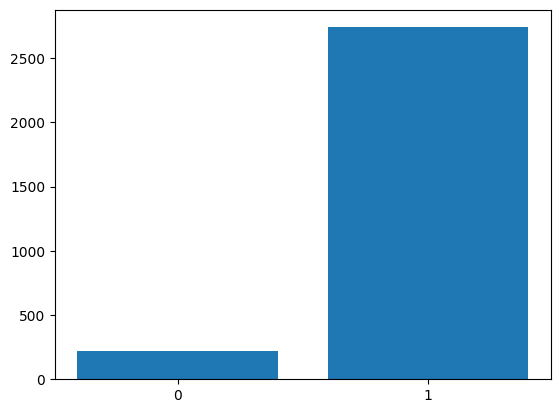

In [245]:
# Plot distribution of dependent variable labels in training set
plot_class_distribution(y_train)

### Single Predictors

Let's evaluate a couple of simple predictors first.

These predictors were chosen since they have characteristics that can help when dealing with an imbalanced predicted class.

* In SVM (Support Vector Machine), you can adjust the cost parameter (C) to penalize misclassifications of the minority class more.
* In Decision Trees you can set the `class_weight` parameter to give more weight to the minority class.

#### Support Vector Machine Classifier

Baseline Ensemble Model experimentation with RBF kernel.

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.982     0.982     0.982        55
           y      0.999     0.999     0.999       685

    accuracy                          0.997       740
   macro avg      0.990     0.990     0.990       740
weighted avg      0.997     0.997     0.997       740

Confusion Matrix:



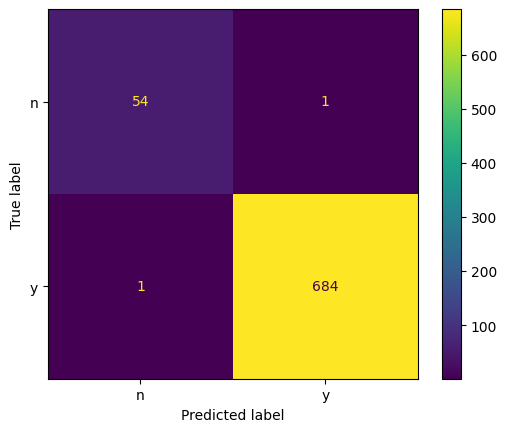

In [246]:
# Create a SVM Classifier, fit the training data and predict 'y'
svm_classifier = SVC(kernel = 'rbf', random_state = 1, gamma=0.1, C=1)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred_svm)

Experiment with parameters C and gamma for a SVM classifier with an RBF kernel.

Best parameters found:
{'C': 10, 'gamma': 0.1}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.982     0.982     0.982        55
           y      0.999     0.999     0.999       685

    accuracy                          0.997       740
   macro avg      0.990     0.990     0.990       740
weighted avg      0.997     0.997     0.997       740

Confusion Matrix:



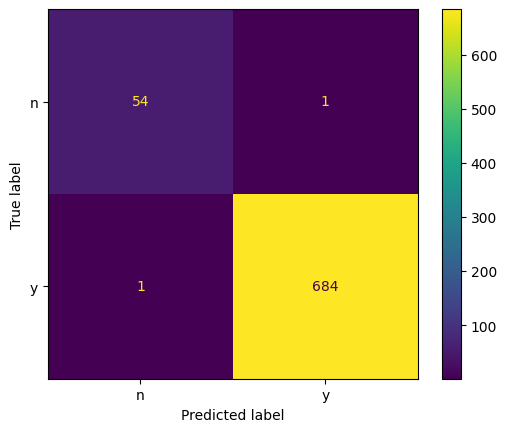

In [247]:
# Create a SVM Classifier
svm_classifier = SVC(random_state = 0, kernel = 'rbf')

# Define a parameter grid for grid search
svm_param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.1, 1, 10]
}

# Perform grid search
svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
print(f'Best parameters found:\n{svm_grid_search.best_params_}\n')

# Predict 'y'
y_pred = svm_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

#### Decision Tree Classifier

Baseline Ensemble Model experimentation.

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.958     0.836     0.893        55
           y      0.987     0.997     0.992       685

    accuracy                          0.985       740
   macro avg      0.973     0.917     0.943       740
weighted avg      0.985     0.985     0.985       740

Confusion Matrix:



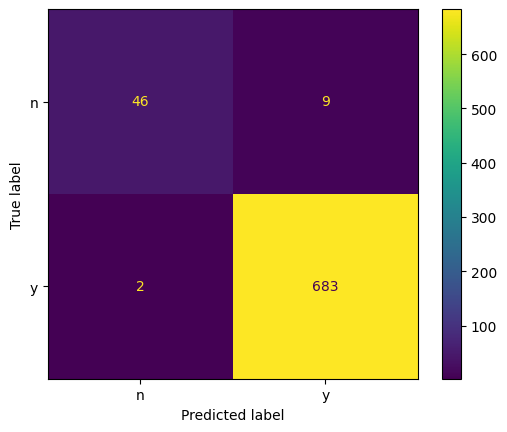

In [248]:
# Create a Decision Tree Classifier, fit the training data and predict 'y'
dt_classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Explicit Grid Search parameter experimentation.

Best parameters found:
{'class_weight': 'balanced', 'criterion': 'gini'}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.958     0.836     0.893        55
           y      0.987     0.997     0.992       685

    accuracy                          0.985       740
   macro avg      0.973     0.917     0.943       740
weighted avg      0.985     0.985     0.985       740

Confusion Matrix:



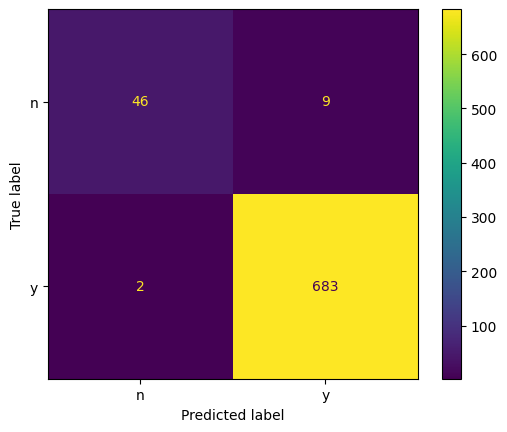

In [249]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state = 0)

# Define a parameter grid for the grid search
dt_param_grid = {
    'criterion': ["gini", "entropy"],
    'class_weight': ["balanced", None]}

# Perform grid search
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5)
dt_grid_search.fit(X_train, y_train)
print(f'Best parameters found:\n{dt_grid_search.best_params_}\n')

# Predict 'y'
y_pred = dt_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Assigning weights to the labels appears in the tuple of best parameters, however, the confusion matrix remains the same as in the default unweighted approach.

### Ensemble Methods

The SVM classifier performs way to good so now let's use the power of a couple of tree-based ensemble methods that have built-in options to handle class imbalance to see if we can improve the performance of a tree-based algorithm for the sake of science.

In tree-based algorithms like **Random Forest** or **XGBoost**, you can set the `class_weight` and the `scale_pos_weight` parameter respectively to give more weight to the minority class.

#### Random Forest Classifier

[Random Forest Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Baseline Ensemble Model experimentation.

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.979     0.836     0.902        55
           y      0.987     0.999     0.993       685

    accuracy                          0.986       740
   macro avg      0.983     0.917     0.947       740
weighted avg      0.986     0.986     0.986       740

Confusion Matrix:



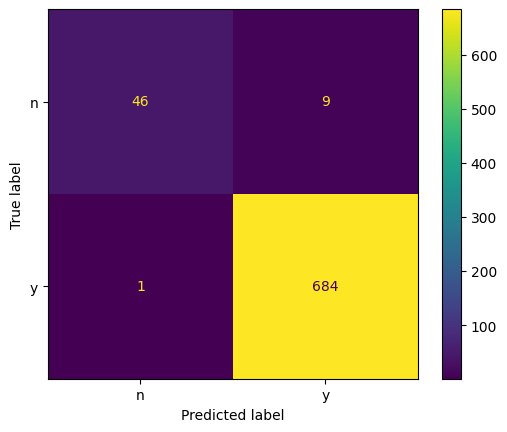

In [250]:
# Create a Random Forest Classifier, fit the training data and predict 'y'
rf_classifier = RandomForestClassifier(n_estimators = 90, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Explicit Grid Search parameter experimentation.

Best parameters found:
{'class_weight': None, 'n_estimators': 180}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.979     0.836     0.902        55
           y      0.987     0.999     0.993       685

    accuracy                          0.986       740
   macro avg      0.983     0.917     0.947       740
weighted avg      0.986     0.986     0.986       740

Confusion Matrix:



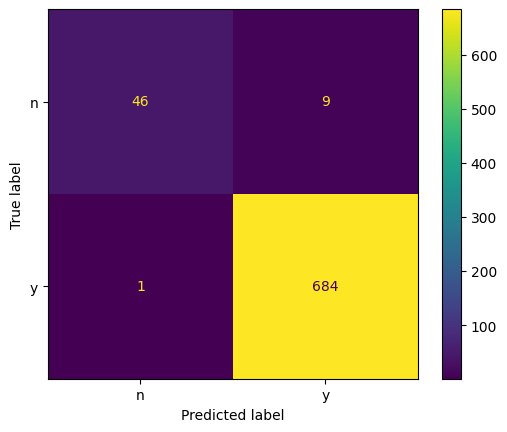

In [251]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(criterion = 'entropy', random_state = 0)

# Define a parameter grid for the grid search
rf_param_grid = {
    'n_estimators': [60, 90, 120, 150, 180],
    #'max_depth' : [5, 10, 15, None],
    #'max_features':["sqrt", "log2"],
    #'criterion': ["gini", "entropy"],
    'class_weight': [None, "balanced", "balanced_subsample"]}

# Perform grid search
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print(f'Best parameters found:\n{rf_grid_search.best_params_}\n')

# Predict 'y'
y_pred = rf_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

After several grid search experimentats we can conclude that assigning weights to each label following Sci-kit learns built-in weight balancing proposals does not do much difference in performance for the Random Forest classifier model.

#### XGBoost

[XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/parameter.html)

Set the label weight parameter to consider the imbalanced dependend variable classes.

In [252]:
# Count the number of positive and negative examples in the target variable
num_positive = sum(y_train == 1)
num_negative = sum(y_train == 0)

# Set the scale_pos_weight parameter just as XGBoost documentation recommends
scale_pos_weight = num_negative / num_positive
scale_pos_weight

0.08068638189120117

Baseline Ensemble Model experimentation.

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.958     0.836     0.893        55
           y      0.987     0.997     0.992       685

    accuracy                          0.985       740
   macro avg      0.973     0.917     0.943       740
weighted avg      0.985     0.985     0.985       740

Confusion Matrix:



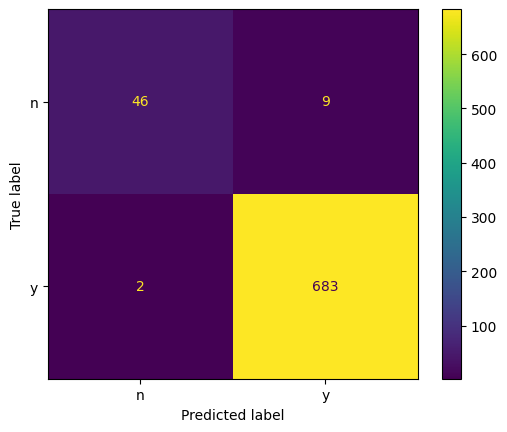

In [253]:
# Create a XGBoost Classifier, fit the training data and predict 'y'
xg_classifier = XGBClassifier(scale_pos_weight=scale_pos_weight)
xg_classifier.fit(X_train, y_train)
y_pred = xg_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Explicit Grid Search parameter experimentation.

Best parameters found:
{'max_depth': 10, 'n_estimators': 50}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.979     0.836     0.902        55
           y      0.987     0.999     0.993       685

    accuracy                          0.986       740
   macro avg      0.983     0.917     0.947       740
weighted avg      0.986     0.986     0.986       740

Confusion Matrix:



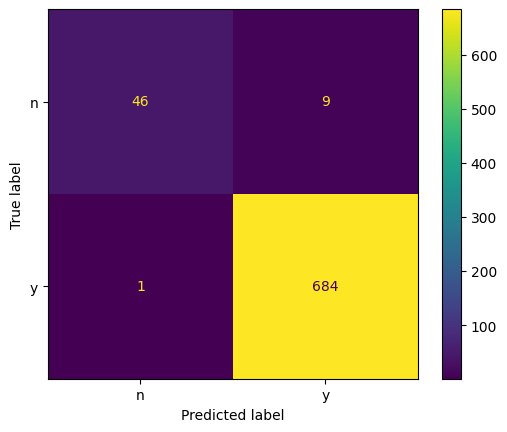

In [254]:
# Create a XGBoost Classifier
xg_classifier = XGBClassifier(scale_pos_weight=scale_pos_weight)

# Define a parameter grid for the grid search
xg_param_grid = {
    'max_depth': [10, 20, None],
    #'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Perform grid search
xg_grid_search = GridSearchCV(estimator=xg_classifier, param_grid=xg_param_grid, cv=5)
xg_grid_search.fit(X_train, y_train)
print(f'Best parameters found:\n{xg_grid_search.best_params_}\n')

# Predict 'y'
y_pred = xg_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Both ensemble methods improve the single decision tree performance to a minimum degree but are still far from the excellent metrics obtained by the SVM classifier.

## Concluding Remarks

SVM classifier was the winner of this small classification contest, so we remember its performance metrics!

Best Classifier: SVM Classifier

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.982     0.982     0.982        55
           y      0.999     0.999     0.999       685

    accuracy                          0.997       740
   macro avg      0.990     0.990     0.990       740
weighted avg      0.997     0.997     0.997       740

Confusion Matrix:



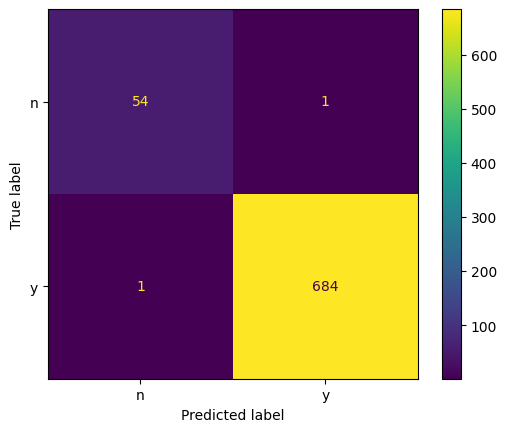

In [255]:
# Print again the performance metris of the best classifier
print('Best Classifier: SVM Classifier\n')
evaluate_classifier(y_test, y_pred_svm)

A simple SVM classifier can be extremely well performant and a fast computing solution for a binary classification task with imbalanced classes when chosen the right kernel followed by a proper tuning of c and Ɣ to handle the bias-variance tradeoff. Decision Trees are also decent at handling the class imbalance with weight-balancing. However, even though ensemble methods such as Random Forest and XGBoost were applied to the base tree predictor they did not seem to significantly increase the overall tree-based performance and were still far from the best SVM metrics.

Further work may include more advanced imbalanced classes handling techniques, such as undersampling, oversampling (SMOTE) or generation of synthetic samples and testing more models, such as logistic regression, ensemble methods with SVM predictors as base learners and neural network classifiers along with more robust hyperparameter tuning processes.
